------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0750605 seconds ----------------
------------- Initialization and postprocessing took 0.0067167 seconds----------------


(0.0, 1.0)

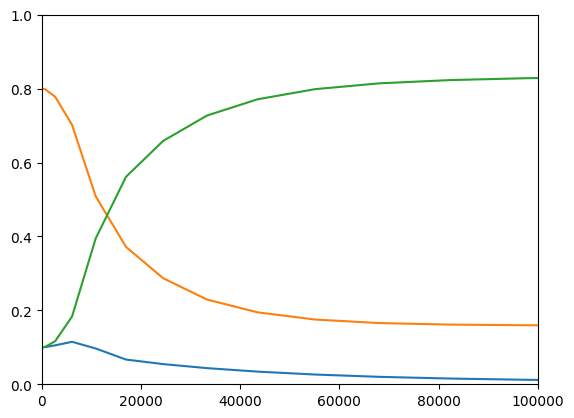

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,vpure,dlnai_dlnxi,D_Matrix,Diffusion_MS_iter,origin_like,lngi,time_dep_surface,dlnai_dlnxi_loop
import matplotlib.pyplot as plt
T=303.15
p=1E5
nc=4 # number of components
L=0.0185 # estimated thickness of the film

Dvec=np.asarray([1.00E-06,5.52E-9,5.52E-9,3.42E-08,3.42E-08,1.00E-21])
mobile=np.asarray([True,True,False,False])
wi0=np.asarray([0.100001667,0.799998333,0.03,0.07])
wi8=np.asarray([0.005951831,0.158725973,0.250596659,0.584725537])
taui=np.asarray([35711.02587,14926.92374])

kijvec=np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100])
kijHBvec=np.asarray([0,0,0,0,-0.455211419,0])
Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02,0.02])
Na=np.asarray([1.,1.,3.,653.])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kAiBi,Na)
t=np.asarray([0,3.660e+03, 7.260e+03, 1.098e+04, 1.446e+04, 1.794e+04, 1.986e+04,
       2.400e+04, 2.760e+04, 3.090e+04, 3.450e+04, 9.180e+04, 1.700e+06])
t=np.linspace(t[0],t[-1]**0.5,51)**2
D=D_Matrix(Dvec,nc)
kij=D_Matrix(kijvec,nc)
kijHB=D_Matrix(kijHBvec,nc)
par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kij,
"kijA":kijHB,
"vpure":vpures}
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)
witB=time_dep_surface(t,wi0,wi8,mobile,taui)

import matplotlib.pyplot as plt
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,witB=witB,nz=3)
plt.plot(t,wt[:,0])
plt.plot(t,wt[:,1])
plt.plot(t,wt[:,2]+wt[:,3])
plt.xlim([0,100000])
plt.ylim([0,1])

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1365903 seconds ----------------
------------- Initialization and postprocessing took 0.0032479 seconds----------------
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 0.1028777 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3062883 seconds ----------------
------------- Initialization and postprocessing took 0.0019593 seconds----------------
------------- Start PC-SAFT modeling ----------------
------------- PC-SAFT modeling took 0.1023042 seconds ----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4907093 seconds -----------

(0.0, 1.0)

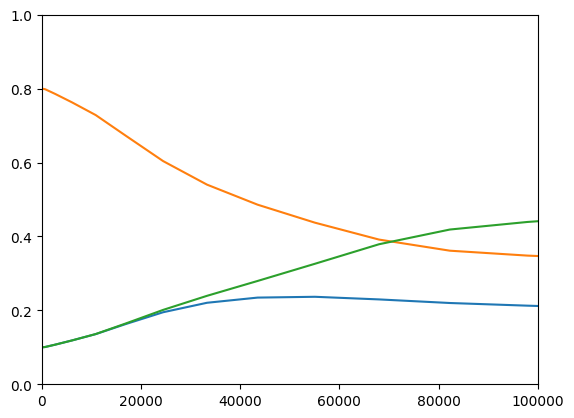

In [2]:
# Dvec=np.asarray([1.00E-06,5.52E-11,5.52E-11,7.42E-7,7.42E-7,1.00E-21]) still problematic
Dvec=np.asarray([1.00E-06,5.52E-11,5.52E-11,7.42E-7,7.42E-7,1.00E-21])
taui=np.asarray([15711.02587,14926.92374])
witB=time_dep_surface(t,wi0,wi8,mobile,taui)
wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun,method="weg",maxit=9,witB=witB,nz=3)
plt.plot(t,wt[:,0])
plt.plot(t,wt[:,1])
plt.plot(t,wt[:,2]+wt[:,3])
plt.xlim([0,100000])
plt.ylim([0,1])
# plt.plot(zvec,wtz[10,0,:])
# plt.plot(zvec,wtz[10,1,:])
# plt.plot(zvec,wtz[10,2,:])
# plt.plot(zvec,wtz[10,3,:])

# plt.plot(zvec,wtz[20,0,:])
# plt.plot(zvec,wtz[20,1,:])
# plt.plot(zvec,wtz[20,2,:])
# plt.plot(zvec,wtz[20,3,:])

# plt.plot(zvec,wtz[40,0,:])
# plt.plot(zvec,wtz[40,1,:])
# plt.plot(zvec,wtz[40,2,:])
# plt.plot(zvec,wtz[40,3,:])